## The Acoustic Channel

In [ ]:
#| default_exp the_acoustic_channel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

## Objectives

----

Physics of sound propagation

- Explain why sound is a pressure wave
- List and describe the important characteristics of sound waves
- Describe the relationship between sound pressure and sound intensity

Sound Speed

- List the factors that affect underwater sound speed (temperature, salinity, pressure)
- Describe how sound speed changes with changes in temperature, salinity, and pressure
- Describe typical sound speed profiles in the world’s oceans and major marginal seas

Refraction and Reflection

- Given a sound speed profile, describe how sound will refract
- Describe the relationship between refraction and frequency
- Describe the factors that affect sound reflection off of the seafloor or sea surface

Propagation Paths

- Describe the surface duct, mixed layer, and sonic layer depth and their interrelationship.
- Describe sound propagation in the surface duct
- Describe the conditions that lead to sound channels
- Describe the deep and secondary sound channels
- Describe the convergence zone
- Describe factors that lead to bottom bounce

Ocean Structures

- Describe how sound propagation is affected by oceanic fronts and eddies

Sources of Change in Ocean Acoustic Features

- Describe seasonal and diurnal effects on ocean sound speed profiles
- Describe the effect of large storms on ocean sound speed profiles
- Describe the effect of internal waves and tides on sound propagation

Scattering and Absorption

- Describe the factors that affect scattering and absorption of sound at the seafloor
- Describe how bathymetry affects scattering and sound propagation
- Describe how seawater absorbs sound energy
- Describe how air bubbles affect sound propagation

Factors Affecting Detection of Sound

- List the factors that affect the detection of sounds under water
- List sources of ambient noise in the ocean
- Describe the difference between spherical and cylindrical spreading of sound waves
- Describe how sound propagation paths affect the detection of sound sources

Sensors

- Explain the difference between active and passive sonar systems
- Describe the strengths and weaknesses of active and passive sonar systems
- Describe the factors that determine target strength

SONAR Equation

- List the variables in the sonar equation
- Recall the difference in the sonar equation for active and passive systems
- Describe the Figure of Merit (FOM)

----

- Acoustic propagation in the ocean
  - fundamental quantities and definitions
  - attenuation, propagation
  - effects of oceanographic quantities (daily, seasonal variations)
      - simulation and predictions
  
- Acoustic directionality
  - arrays
  - beam patterns
  - directity index
  - beamforming
  
- Sonar System
  - resolution vs range and frequency content  
  - sonar equations
  
- Reflections at the water-bottom interface
  - coherent reflection
  - Rayleigh coefficient
  - backscatter
  
- Propagation in sediments and rocks
  - P waves
  - S waves
  - interface waves
  - geoacoustic inversion


------

## The Acoustic Channel

### Key facts
- It is a channnel where energy/information is transmitted subjected to specific characteristics:
1. High propagation delay
    - Typical sound speed: 1500 m/s ($\pm$ 50m/s)
    - ex. Tx-Rx are 1500m away, propagation delay is 1s

- Absorption (intrinsit attenuation of the medium) is proportional to frequency
  - see this for a nice intuitive introduction [here](https://dosits.org/science/movement/why-does-sound-get-weaker-as-it-travels/sound-absorption/)
  - ex. $\alpha \approx 30$ dB/km at $100$ kHz
  - Attenuation is sometime also expressed in terms of how much dB I lose per wavelength.
     - The higher the frequency, the more wavelengths we have between Tx and Rx
     - Practically useful: we can represent attenuation with a single number independently of frequency
     - $\approx 0.0005$ dB/wavelength. Attenuation is point-wise linear (we will see this later)
  
$$
A = A_oe^{-\alpha x}
$$

see also [National Physical Laboratory | Technical Guide](http://resource.npl.co.uk/acoustics/techguides/seaabsorption/)


- A second attenuation mechanism of acoustic signals: Sound Spreading (Geometrical attenuation)
  - Recall that acoustic intensity, is given by power per unit surface::
      $$I = \frac{P^2}{\rho C}, \;\; Z=\rho C \;\; \text{is the sound impedance}$$
  
  - Let's think of a spherical wavefront under a sinuosoidal perturbation in an isotropic medium, power is ditributed across the wavefront. As the wavefront gets bigger and bigger, the same power must distribue across a larger area, hence power per unit of surface decreases as the wavefront gets bigger.
  
  _Spreading loss occurs because the total amount of energy in a wave remains the same as it spreads out from a source. (We are neglecting sound absorption for the moment.) When the circle of a surface wave gets bigger the energy spreads to fill it. Therefore, the energy per unit length of the wave must get smaller._
  From [Discovery of sound in the sea](https://dosits.org/science/movement/why-does-sound-get-weaker-as-it-travels/sound-spreading/).
    
  - There are two limiting cases:
      - **spherical spreading** ($\approx R^2$). Surface is proportial to square of the distance (between Tx and RX).             
      - Corresponds to a point source radiating wave crests that are three-dimensional spheres.  
      In this case, the area of the spherical shell over which the energy is spread depends on the square of the distance from the source: $A=4 \pi r^2$.  
      - By convention, a reference intensity, $I_0$, is located at a 1 m distance from an acoustic source. 
      - The total energy transport through the spherical shell at $1$ m distance is: $I_0 4 \pi 1^2=4 \pi I_0$. 
      - The total energy transport must be the same through the spherical shell located at $r$ meters from the source: $4 \pi I_0 = 4 \pi r^2 I(r)$.
      - Thus, the intensity at radius, r is: $I(r) = \frac{I_0}{r^2} $
      
      - **cylindrical spreading** ($\approx R$). 
      - We can have cylindrical propagation in shallow waters when the wavefront hits the seafloor and sea surface.
      - Corresponds to the situation where the sound has already reached the top and bottom of the ocean and is repeatedly reflecting from both boundaries. 
      - Most of the energy that would have left the system is redirected by these reflections back into the ocean interior (with some loss).
      - This purely horizontal spreading results in distribution of energy over cylindrical shells of area $A=2 \pi r H$, where $H$ is the depth of the ocean. 
      The intensity at a distance, r, from the source is: $ I(r) = \frac{I_0}{r}.$
      
      
<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/26.spread-circles2.jpg" alt="26.spread-circles2" style="width: 550px;"/> 
    </td>
        <td> <img src="./images/2.ocean-acoustics/27.spread-dwsi.gif" alt="27.spread-dwsi" style="width: 550px;"/> 
    </td>    
    </tr>
    <tr>
        <td></td>
        <td>Pictures from Discovery of sound in the sea: https://dosits.org/science/advanced-topics/cylindrical-vs-spherical-spreading/</td>
    </tr>
</table>  
      
      
  _Sound traveling in the sound channel behaves the most like cylindrical spreading, because in this case the channelization is caused by continuous refraction rather than reflection off the top and bottom of the ocean; the latter process involves much more loss of sound energy due to interactions with the boundaries. Spherical spreading is usually applied only relatively close to a source, perhaps 1-5 km in distance depending on the depth of the ocean and source. In most modern applications, complex numerical models of sound propagation are used for greater accuracy._  
  
  - As sound waves travel through the water, the intensity is also decreased due to chemical attenuation (negligible for our purposes).
 
  
- Waveguide character of the acoustic channel
  - Acoustic rays are refracted by Snell's law
  - Multipath arrivals (e.g. reflections from sea surface or sea bottom)
  - Local refractions depend on local sound speed gradient depends on local oceanography

## Absorption or Intrinsic Attenuation


<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/28.attenuation.png" alt="28.attenuation" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td>From Springer Handbook of Acoustics</td>
    </tr>
</table>  


Phasor form of the intrinsic attenuation:
$$
A = A_oe^{-\alpha x}
$$

- Attenuation depends on frequency 
  - $1$ Hz signal, is attenuated by approx $0.001$ per km (1 dB attenuation after 1000km, equator is 40K km)
  - $1$ kHz signal, is attenuated by approx $1$ dB per km
  - $100$ kHz signal, is attenuated by $100$ dB after $1$ km
  - Low frequencies are not intrinsically attenuated very much (counts more geometric attenuation)
  - High frequencies are highly intrinsically attenuated (counts much more than geometric attenuation)
  
  - Low frequency signals (which have low bitrate or low resolution) can propagate very far
  - High frequency signals (which have higher bitrate or high resolution) can propagate only for small distances.
  
- Pointwise linear: at different frequencies different mechanisms affect attenuation
  - e.g., heat produced by friction between water particles and hence energy is transformed into heat

## Phasor Notation for absorption

- Used in scientific papers (e.g., considering a complex sound speed)
- Including an imaginary term in the sound speed makes it possible to mathematically model the intrinsic attenuation

- Pressure (at fixed angular frequency $\omega$) including perturbation and attenuation:

$$
p(x) = Ae^{ikx}e^{-\alpha x} = Ae^{ikx(1+i\delta)}
$$

where $\delta = \frac{alpha}{k} = \frac{\alpha c}{\omega}$

- Remember that $k=\frac{\omega}{c}$

- If we consider no attenuation:

$$
p(x) = Ae^{ikx}
$$


- if $c = c_r - ic_i$: sound speed is composed of a real term (the actual sound speed) and of an imaginary term

$$
\Large p(x) = Ae^{i\omega x \frac{c_r + ic_i}{c_r^2+c_i^2}} \approx Ae^{ikx}e^{-\frac{\omega x}{c_r^2}c_i}
$$

where $c_i=\frac{\alpha}{\omega}c_r^2$

- Using a complex sound speed we have recovered the generic form of the pressure which included the attenuation (see equation above)
- Phasor notation makes it possible to model the intrinsic attenuation, adding an imaginary term (which depends on the intrinsic attenuation) to the speed of sound.


## Geometrical Spreading

<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/29.geometrical-spreading.png" alt="29.geometrical-spreading" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td>From Computational Ocean Acoustics</td>
    </tr>
</table>  

- Geometrical spreading is an additional source of attenuation
- Note that when we have multiple sources of attenutation and they are represented in dB, we cannot sum them in dB and need to be converted back to a linear scale (and then back to dB)
     - Typically one of the mechanism is much higher and we can safely consider that
     - Geomtrical attenuation is prevalent in low frequency regimes
     - Intrinsic attenuation is prevalent in high frequency regimes

## Combined Spreading Loss

- Sound will propagate spherically near the source. At some range H, the spherical wave hits the sea floor, from here on, sound propagates cylindrically. 

<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/30.combined-spreading.png" alt="30.combined-spreading" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td>From Jasco Underwater Acoustics: Noise and the Effects on Marine Mammals Pocket Handbook.</td>
    </tr>
</table>  

- $RL$, Received Level
- Cylindrical attenuation: $RL$ decreases $10$dB/decade
- Spherical attenuation: $RL$ decreases $20$dB/decade
- Combined curve: starts spherical and then goes cylindrical (e.g., shallow waters)
- At $100$ kHz: $>40$ m, intrinsic attenuation starts to prevail
- At $10$ kHz: $>40$ m, intrinsic attenuation starts to prevail

## Additional Loss Factors: Interference

- Most sources of interest in the deep ocean are closer to the surface than to the bottom
- In this case, the direct path and the surface reflected path are the two main short-range paths
- When these two paths interfere, they produce a spatial distribution of sound often referred to as a **Lloyd mirror pattern**

- Depends on the geometry between source and received
- Does not depend on the property of the medium


<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/31.lloyd-mirror-3.png" alt="31.lloyd-mirror" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td></td>
    </tr>
</table>  

- Source (and Receivers) are close to the surface
- Source is a point source placed near a smooth, perfectly reflecting sea surface
- Distance between Source and Receiver is much larger than the distance between Source and sea surface
- Isotropic medium (sound speed is the same in every direction)
- What is the pressure $p(r,z)$ at the receiver's location when the source at depth $z_s$ transmits an harmonic signal $e^{i\omega t}$ (i.e., $\omega$ is known) with outward propagating spherical waves ($e^{-ikr}$)?

Let's follow each path (we suppress the time dependence $e^{-i\omega t}$ for simplicity).

- Direct:
 $$
 R_1 = \sqrt{r^2 + (z_r-z_s)^2}
 $$

 $$
 p_1(r,z) = \frac{e^{ikR_1}}{R_1}
 $$
 
 - Note that this is spherical spreading (we are describing pressures not intensities, which are the square of the pressure)
 
- Reflected path:
  - We can imagine that is a straight path from the source specular reflection ($-z_s$) around the ocean surface to the receiver
  
 $$
 R_2 = \sqrt{r^2 + (z_r+z_s)^2}
 $$ 
  
 $$
 p_2(r,z) = -\frac{e^{ikR_2}}{R_2}
 $$
    
- Since pressures are additive:

$$
p(r,z) = p_1(r,z) + p_2(r,z) = \frac{e^{ikR_1}}{R_1} -\frac{e^{ikR_2}}{R_2}
$$

 - Note that the wavefront $p_2$ changes phase (180 deg) when it is reflected off the sea surface to satisfy the pressure-release boundary condition ($p = 0$) at the sea surface.

- Let's call $R$ the distance between the 0 depth point along the source-ocean line (origin) and the receiver

- Let's consider the angle $\phi$ between $R$ and the $x$-axis


<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/31.lloyd-mirror-4.png" alt="31.lloyd-mirror" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td></td>
    </tr>
</table>  

The previous equation is a complex interference pattern.

We can simplify it, assuming $R >> z_s$:

$$
R_1 \approx R-z_s\sin(\phi)
$$


$$
R_2\approx R+z_s\sin(\phi)
$$


<table>
    <tr>
        <td> <img src="./images/2.ocean-acoustics/31.lloyd-mirror-5.png" alt="31.lloyd-mirror" style="width: 550px;"/> 
    </td>        
    </tr>
    <tr>
        <td></td>
    </tr>
</table> 



$$
p(r,z) \approx \frac{1}{R} \Big [ e^{ik(R-z_s\sin(\phi))} -  e^{ik(R+z_s\sin(\phi)) } \Big ] = 
\frac{e^{ikR}}{R} \Big [ e^{-ik(z_s\sin(\phi))} -  e^{ik(z_s\sin(\phi))} \Big ]
$$

We next replace the two exponentials by a trigonometric function to obtain:

$$
p(r,z) = \frac{-2i}{R}sin(kz_s \sin(\phi))e^{ikR}
$$

which means that the amplitude variation takes the simple form:

$$
|p| = \frac{2}{R}|sin(kz_s\sin(\phi))|
$$

and the maximum:

$$
|p_{max}| = \frac{2}{R}\;\; \text{for}\;\;\sin(\phi)=(2m-1)\frac{\pi}{2}\frac{1}{kz_s}\;\; m=1,2,...M 
$$

- Note that when $\sin(\phi)=(2m-1)\frac{\pi}{2}\frac{1}{kz_s}$, then $\sin(kz_s\sin(\phi))$ is a multiple of $\pi/2$ and hence a maximum.

- Since, $\sin(\phi)=(2m-1)\frac{\pi}{2kz_s}$ and $\sin(\phi)\in [-1, 1 ]$, this limits the maximum $m$ and hence the number of Lloyd-mirror beams $M$ is _finite_ and can be obtained from:

$$
(2M-1)\frac{\pi}{2kz_s} \le 1 \Rightarrow M= \Big \lfloor \frac{2z_s}{\lambda}+\frac{1}{2} \Big \rfloor
$$

where $\lambda$ is the acoustic wavelength.

- The number $M$ tells us what are the directions $\phi$ where we have a maximum (see Depth-Range Contour Figure below).

- the number of beams is directly protional to the distance of the source from the surface in terms of wavelengths.


In underwater acoustics, the dependence of sound pressure on distance at a fixed depth $z_r$ is of great importance.

- Substituting $\sin(\phi) = z_r/R$ in $
|p| = \frac{2}{R}|sin(kz_s\sin(\phi))|
$ and considering large ranges ($r >> z_r;\;\; \sin(\phi) \approx \phi)$) we obtain:

$$
|p| \approx \frac{2kz_sz_r}{r^2}
$$

- This is a farfield decay. 
- When $r$ is large enough w.r.t. $z_s$ we do not have directions $\theta$ where we have interference (constructive or distructive).


A pressure amplitude decay proportional to $r^2$ (intensity $\propto$ to $r^4$) is equivalent to a transmission loss of:

$$
TL = 40\log(r)
$$

which is twice the loss associated with spherical spreading. 

Note, that this strong farfield field decay is entirely an interference effect!

- Depending on where we are in space, the harmonic wave travelling along the two paths can arrive in phase (constructive interference) or out of phase (destructive interference).
- Waves sum up
- $e^{kx}$ determines the phase of the wave and how they interfere at the receiver
- As we move in space we vary $r$ and we change $\theta$.

#### Example

Let's consider a $150$ Hz source, placed $25$ m below the sea surface in a homogeneous water column of infinite extent and with a sound speed of $1500$ m/s. The acoustic wavelength is $\lambda=10$ m.

Receiver is $200$ m deep.

$$
p(r, z)= \frac{e^{ikR_1}}{R_1} -\frac{e^{ikR_2}}{R_2}
$$


We can now plot the TL field.

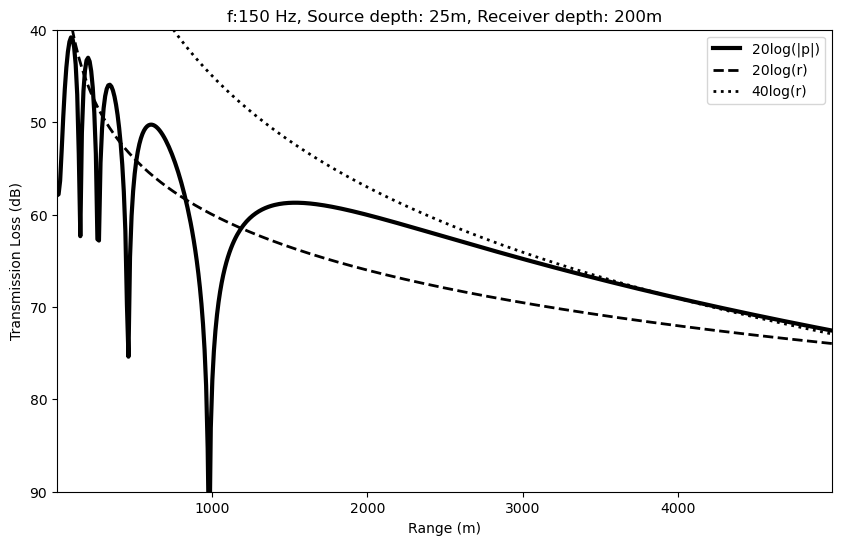

In [ ]:
f = 150   # source frequency (Hz)
c = 1500  # sound speed (m/s)
λ = c/f   # wavelength lambda (10m in our example)

z_s = 25  # source depth (m)
z_r = 200 # receiver depth (m)

omega = 2*np.pi*f # angular frequency
k = 2*np.pi/λ     # wavenumber

range_v = range(1,5000,10) # horizontal range (receiver)

# apply the equations seen above
p = []   # pressure
for r in range_v:
    R1 = np.sqrt(r**2+(z_r-z_s)**2)
    R2 = np.sqrt(r**2+(z_r+z_s)**2)
    p.append(1/R1*np.exp(1j*k*R1)-1/R2*np.exp(1j*k*R2))

##
## Plot results
plt.figure(figsize=(10,6))

# 1. plot the pressure computed from the exact field solution
# Note the oscillating field structure with five peaks and a farfield decay proportional to 40 log r .
plt.plot(range_v, -20*np.log10(np.abs(p)), 
         color='k', linestyle='-', linewidth=3, label='20log(|p|)')

# 2. plot the 20*log10(r) behaviour
plt.plot(range_v, 20*np.log10(range_v),
         color='k', linestyle='--', linewidth=2, label='20log(r)')

# 3. plot the 40*log10(r) behaviour corresponding to farfield decay. 
# Plotted with an offset to make it simpler to compare with the exact pressure field.
plt.plot(range_v, 40*np.log10(range_v)-75, 
         color='k', linestyle=':', linewidth=2, label='40log(r)')

plt.legend()
# set axis limits and invert y axis
plt.xlim(min(range_v), max(range_v))
plt.ylim(40, 90)
plt.gca().invert_yaxis()

# add labels
plt.title('f:150 Hz, Source depth: 25m, Receiver depth: 200m')
plt.ylabel("Transmission Loss (dB)");
plt.xlabel("Range (m)");


- $TL=10\log\frac{I}{I_0}=20\log\frac{p}{p_0}$, always negative (or less than 1 in linear scale)
- $TL$ represented as a positive value in dB (we invert its sign and the $y$ axis when we plot it)

- Minimum of $TL$ corresponds to maximum of pressure $p$. 
- For large enough $r$ there are no more maxima, and we are in the far field decay which is proportional to $40\log(r)$
- $20\log(r)$ (dashed line) is the ideal gemetrical spherical attenuation. 
- For large enough $r$, the attenuation due to interference is higher than gemetrical spherical attenuation (happens at about $8$ km in this example)
- The attenuation due to interence adds to the intrinsic and gemetrical attenuation. 
- We can still use a dominant attenuation.

And if we vary the receiver horizontal range $r$ and its depth $z_r$:

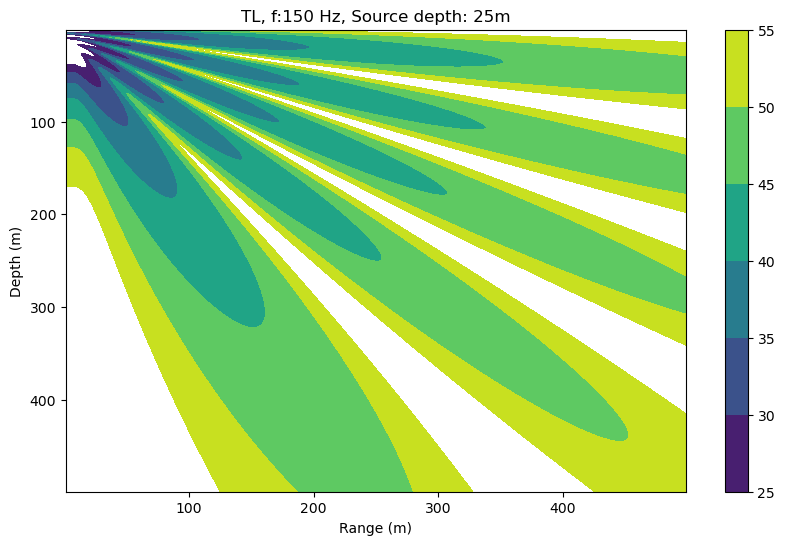

In [ ]:
f = 150   # source frequency (Hz)
c = 1500  # sound speed (m/s)
l = 10    # wavelength lambda

z_s = 25  # source depth (m)

omega = 2*np.pi*f # angular frequency
k = 2*np.pi/l     # wavenumber

range_v = range(1, 500, 1)       # horizontal range (receiver)
range_z_r = np.arange(1, 500, 1) # receiver depth (m)

p = np.zeros(shape=(len(range_z_r), len(range_v)), dtype=complex) # pressure
for id_zr, z_r in enumerate(range_z_r):         
    # apply the equations seen above
    for id_r, r in enumerate(range_v):
        R1 = np.sqrt(r**2+(z_r-z_s)**2)
        R2 = np.sqrt(r**2+(z_r+z_s)**2)
        p[id_zr, id_r] = 1/R1*np.exp(1j*k*R1)-1/R2*np.exp(1j*k*R2)


##
## Plot
plt.figure(figsize=(10,6))
plt.matplotlib.pyplot.contourf(range_v, range_z_r, -20*np.log10(np.abs(p)),
                              levels=[25, 30, 35, 40, 45, 50, 55])
plt.gca().invert_yaxis()

# add labels
plt.title('TL, f:150 Hz, Source depth: 25m')
plt.ylabel("Depth (m)");
plt.xlabel("Range (m)");

plt.colorbar()
plt.show()


- Note the $\theta$ directions corresponding to the pressure maximum
- The $\theta$ directions are finite
- Interference patterns vary depending on frequency (depend on $k$)

If we increase the frequency to $f=300$ Hz

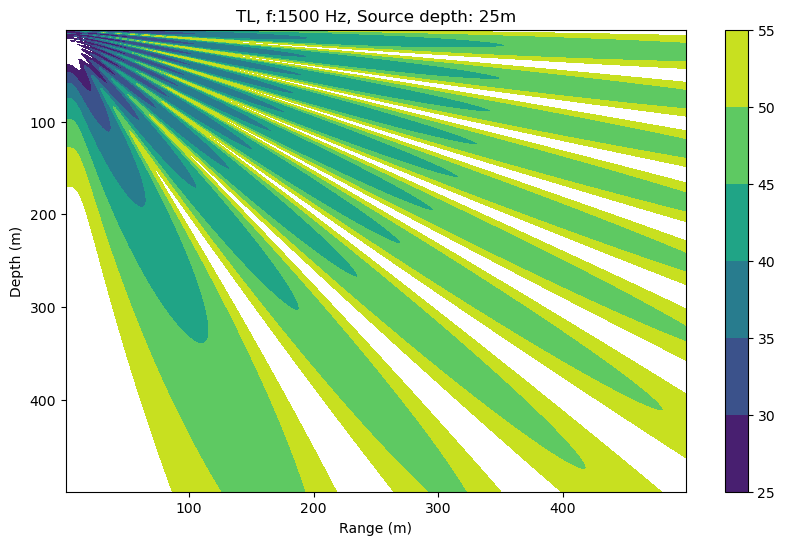

In [ ]:
f = 300   # source frequency (Hz)
c = 1500  # sound speed (m/s)
λ = c/f   # wavelength lambda

z_s = 25  # source depth (m)

omega = 2*np.pi*f # angular frequency
k = 2*np.pi/λ     # wavenumber

range_v = range(1, 500, 1)       # horizontal range (receiver)
range_z_r = np.arange(1, 500, 1) # receiver depth (m)

p = np.zeros(shape=(len(range_z_r), len(range_v)), dtype=complex) # pressure
for id_zr, z_r in enumerate(range_z_r):         
    # apply the equations seen above
    for id_r, r in enumerate(range_v):
        R1 = np.sqrt(r**2+(z_r-z_s)**2)
        R2 = np.sqrt(r**2+(z_r+z_s)**2)
        p[id_zr, id_r] = 1/R1*np.exp(1j*k*R1)-1/R2*np.exp(1j*k*R2)


##
## Plot
plt.figure(figsize=(10,6))
plt.matplotlib.pyplot.contourf(range_v, range_z_r, -20*np.log10(np.abs(p)),
                              levels=[25, 30, 35, 40, 45, 50, 55])
plt.gca().invert_yaxis()

# add labels
plt.title('TL, f:1500 Hz, Source depth: 25m')
plt.ylabel("Depth (m)");
plt.xlabel("Range (m)");

plt.colorbar()
plt.show()


### Transmission Loss in water


<table>
    <tr>
    <td> <img src="./images/2.ocean-acoustics/32.tl-mediterranean-sea.png" alt="32.tl-mediterranean-sea" style="width: 350px;"/> 
    </td>        
    <td> <img src="./images/2.ocean-acoustics/33.tl-baltic-sea.png" alt="33.tl-baltic-sea" style="width: 350px;"/> 
    </td>        
    </tr>
    <tr>
        <td>Simulation of Transmission Loss (dB) in the Mediterranean Sea; salinity: 38psu. EU FP7 UAN Project.</td>
        <td>Simulation of Transmission Loss (dB) in the Baltic Sea; salinity: 7psu. EU FP7 UAN Project.</td>
    </tr>
</table> 



- Attenuations due to intrinsic attenuation and geometric attenuation.
- No interference.
- At the same distance (range), the higher the frequency, the higher the loss (intrinsic attenuation).
- At the same frequency, the higher the distance, the higher the loss (geometric attenuation).

- Salinity is dramatically different.
- Salinity has a high impact on attenuation. 
- Consider for example:
   - 5km and 15kHz: around 5dB of difference;
   - 15km and 20kHz: around 8dB of difference.
